# COVID and Vaccinations in the U.S.

### Introduction
In the United States, public health officials have been pushing Americans to get vaccinated in order prevent COVID-19 infection and to (hopefully) bring the pandemic in the United States to an end. This data will analyze the CDC data reporting on vaccinations as well as new COVID-19 cases and new COVID-19 deaths. 

#### Key insights revealed by the CDC’s dataset include:
- The pandemic in the United States occured in waves - with new case counts at an elevated level until now
- Vaccinations have made significant progress and made a noticeable impact on the pandemic
- Vaccinations have slowed but new cases and deaths have fallen at an accelerated pace
- The United States pandemic is slowing but is still not over (especially considering the worldwide pandemic)

As of May 2021, the U.S. public health outlook is optimistic. Public health officials revoked the mask mandate on fully vaccinated individuals, half of the U.S. population has received at least one dose of a COVID-19 vaccine, and – at the same time – the levels of new cases and deaths have fallen to levels not seen since last year when the pandemic began. 

In [1]:
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
vacc_total_state = pd.read_csv("covid19_vaccinations_in_the_united_states.csv", skiprows=2)
vacc_time = pd.read_csv("trends_in_number_of_covid19_vaccinations_in_the_us.csv", skiprows=2)

In [3]:
vacc_perday = vacc_time.loc[vacc_time['Date Type'] == 'Admin'][['Date',
                                                                 'Total Doses Administered Daily',
                                                                 'Total Doses Administered Cumulative',
                                                                 'People Fully Vaccinated Cumulative'
                                                                ]]
vacc_perday = vacc_perday.groupby('Date').sum().reset_index(drop=False)

### Vaccination Progress
Vaccinations seem to follow a day in the week pattern, with vaccinations peaking in the middle of the week. The number of vaccinations exponentially rise, peaking at the start of April. Vaccinations have been slowing down since. 

In [4]:
vacc_base = alt.Chart(vacc_perday).encode(
    alt.X('Date:T', axis=alt.Axis(title=None))
)
vacc_perday_chart = vacc_base.mark_bar().encode(
    y=alt.Y('Total Doses Administered Daily',axis=alt.Axis(title='Daily Vaccinations', titleColor='#5276A7'))
).properties(width=800)

In [5]:
vacc_cumulative_chart = vacc_base.mark_line().encode(
    y=alt.Y('Total Doses Administered Cumulative', 
            axis=alt.Axis(title='Cumulative Total Vaccinations', titleColor='#57A44C')),
    color=alt.value('#57A44C')
).properties(width=800)

In [6]:
vacc_fully_chart = vacc_base.mark_line().encode(
    y=alt.Y('People Fully Vaccinated Cumulative', 
            axis=alt.Axis(title='People Fully Vaccinated Cumulative', titleColor='orange')),
    color=alt.value('orange')
).properties(width=800)

#### New Vaccinations per day with cumulative totals

In [7]:
alt.layer(vacc_perday_chart, vacc_cumulative_chart).resolve_scale(
    y = 'independent'
)

alt.LayerChart(...)

New vaccinations per day (blue) with the cumulative total number of vaccinations (dose one and two, if applicable).

In [8]:
alt.layer(vacc_perday_chart, (vacc_fully_chart + vacc_cumulative_chart)).resolve_scale(
    y = 'independent'
)

alt.LayerChart(...)

Of all the cumulative vaccinations (green), just under half of the cumulative total are fully vaccinated (orange).

### Patterns in the Case Numbers
The new cases per day show that there have been three major waves: March through April, June through August, and November through February. There is also an outbreak of cases starting in March of 2021, but new cases fall after a brief increase. This shows a pattern of new outbreaks every 3-4 months, and another wave may have been expected in March 2021 failing to take hold, possibly as a result of the vaccination effort.

In [9]:
cd_bystate = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')
total_case_time = cd_bystate.groupby('submission_date')[['tot_cases', 'new_case', 'new_death']].sum().reset_index()
total_case_time['submission_date'] = pd.to_datetime(total_case_time['submission_date'])
total_case_time = total_case_time.sort_values(by=['submission_date'], ascending=True)

In [10]:
base = alt.Chart(total_case_time).encode(
    alt.X('submission_date:T', axis=alt.Axis(title=None))
)

cumulative_chart = base.mark_line().encode(
    alt.Y('tot_cases',
          axis=alt.Axis(title='Cumulative Cases (Total)', titleColor='#5276A7')),
).properties(width=800)

new_cases_chart = base.mark_line().encode(
    alt.Y('new_case',
          axis=alt.Axis(title='New Cases', titleColor='purple')),
    color=alt.value('purple')
).properties(width=800)

new_deaths_chart = base.mark_bar().encode(
    alt.Y('new_death:Q',
         axis=alt.Axis(title='New Deaths', titleColor='red')),
    color=alt.value('red')
)

#### New Cases and Cumulative Cases

In [11]:
alt.layer(new_cases_chart, cumulative_chart).resolve_scale(
    y = 'independent'
)

alt.LayerChart(...)

In [12]:
alt.Chart(total_case_time.iloc[50:]).mark_line().encode(
    x=alt.X('submission_date:T', axis=alt.Axis(title=None)),
    y=alt.Y('new_case',
          axis=alt.Axis(title='New Cases', titleColor='green'), 
          scale=alt.Scale(type='log')),
    color=alt.value('green')
).properties(width=800)

alt.Chart(...)

Log adjusted new case counts. Shows a steeper drop in cases after the third and fourth peaks compared to the first and second waves.

In [13]:
alt.layer(new_deaths_chart, base.mark_line().encode(
    alt.Y('new_case',
          axis=alt.Axis(title='New Cases', titleColor='greem')),
    color=alt.value('green')
    ).properties(width=800)).resolve_scale(
    y = 'independent'
)

alt.LayerChart(...)

The number of deaths (red) rises when there is a rise of cases with a lagging factor.

In [14]:
alt.layer(new_cases_chart, (vacc_cumulative_chart+vacc_fully_chart)).resolve_scale(
    y = 'independent'
)

alt.LayerChart(...)

New cases of COVID seem to drop with more vaccinations (green), especially with full vaccinations (orange).

#### Comparing the waves of cases before and after vaccinations

In [15]:
seven_day_avg = total_case_time['new_case'].rolling(7).mean().iloc[::7].to_frame().reset_index()
seven_day_avg['min'] = seven_day_avg.new_case[(seven_day_avg.new_case.shift(1) > seven_day_avg.new_case) & 
                                              (seven_day_avg.new_case.shift(-1) > seven_day_avg.new_case)]
seven_day_avg['max'] = seven_day_avg.new_case[(seven_day_avg.new_case.shift(1) < seven_day_avg.new_case) & 
                                              (seven_day_avg.new_case.shift(-1) < seven_day_avg.new_case)]

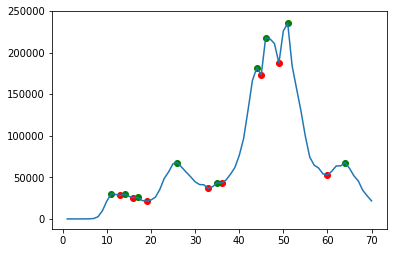

In [16]:
plt.scatter(seven_day_avg.index, seven_day_avg['min'], c='red')
plt.scatter(seven_day_avg.index, seven_day_avg['max'], c='green')
seven_day_avg.new_case.plot()

Green dots refer to a local maximum, and red dots a local minima. The absolute maxima and minima of each wave are compared as a percent drop in cases.

In [17]:
first_wave_drop = (seven_day_avg['max'].unique()[1] - seven_day_avg['min'].unique()[3]) / seven_day_avg['max'].unique()[1]
second_wave_drop = (seven_day_avg['max'].unique()[4] - seven_day_avg['min'].unique()[5]) / seven_day_avg['max'].unique()[4]
third_wave_drop = (seven_day_avg['max'].unique()[8] - seven_day_avg['min'].unique()[8]) / seven_day_avg['max'].unique()[8]
fourth_wave_drop = (seven_day_avg['max'].unique()[9] - seven_day_avg['new_case'].iat[-1]) / seven_day_avg['max'].unique()[9]
pd.DataFrame(data={'Peak to Trough Drop': [first_wave_drop, second_wave_drop, third_wave_drop, fourth_wave_drop]},
             index=['First Wave (March)', 'Second Wave (June)', 'Third Wave (December)', 'Fourth? Wave (March 2021)']
            )

,Peak to Trough Drop
First Wave (March),0.295471
Second Wave (June),0.366232
Third Wave (December),0.775774
Fourth? Wave (March 2021),0.680417


The first and second waves only experience a drop in cases of about 30% before plateauing compared to steeper drops of the third and fourth (this may not be large enough an increase to be a wave) which are both around 70%. This is a major difference from before vaccines were distributed.

### Discussion
There are, of course, limitations to these findings. While vaccine trials of all the preauthorized vaccines show a reduction in COVID cases in addition to no deaths, this cannot be definitively said of the population overall. This data does provides evidence that vaccines have helped stem the pandemic, especially when added onto the findings from each vaccine trial. Even so, there are still questions that cannot preclude a conclusion. For one, cases started to fall before vaccinations really started to take hold, especially considering that full vaccinations lag behind. Another is the actual extent that the fall in cases being due to vaccinations or acquired immunity from recovered cases. That being said, there are pointers that vaccinations have had a positive impact in the pandemic.

In the observed data, there is a new surge in cases every three to four months. Precluding each peak is a plateauing of new cases - and each being higher than the previous dip - which happens before both the second and third waves. This does happen briefly before a fourth rise in cases, but this time the outbreak is brief and falls continuously after. This is further supported by the percent drop in new cases where before the two waves were follwed by 29.5% and 36.6% drops compared to the 77.5% and 68.0% drops after the vaccinations start. While the third wave is much more severe than the previous waves (and a larger drop may be expected), the large drop after the smaller fourth peak supports vaccinations mitigating new COVID cases.

Given this, the data points to a positive direction in the pandemic. New cases are falling and deaths - which closely follow case numbers with a lag - are also falling. That being said, the final takeaway from the data is that the pandemic still is not over. With there being new - albeit falling - cases and deaths, that still means that the number of deaths is rising, and every death is a tragedy. Not to mention the record amount of cases abroad. As such, even though 50% vaccination is good progress, there is still more ways to go.